In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PARAM_HVR import mean_rr,mean_hr,sdnn, sdsd, rmssd, rmssd_sdsd, time_domain_analysis, poincare, stress_index, res_index, pns_index
from PARAM_HVR import sns_index, iterative_sd, iterative_mean, frequency_domian, countPairsWithDiffK,kurtose,skewness,relativeRR
from entropy import *

In [2]:
P1_data = pd.read_csv('0. interim/swell/rri/p1.csv')

In [3]:
time_sec = P1_data['Time']
time_min =P1_data['Time']/60
RR = P1_data['rri']

In [4]:
#Die Methode "find_Time_index" liefert der Index einer gegebenen Zeit zurück
#@param zeit soll genau sein d.h in der list "time_min" vorhandeln sein ZB. 1.0002604166666667 für 1min, 5.0002604999999996 für 5min usw 
#um die genau zeit abzulesen soll die fongende kommenzierte code ausführt werden 
#for t in time_min:
        #print(t)
    
def find_Time_index(zeit):
    index=0
    for times in time_min:
        index=index+1
        if(zeit==times):
            break
            
    return index-1

In [5]:
#Die Methode "random_rr" gibt eine zufällige liste von X elements entlang der rri-liste zurück
# X ist ein Zeitindex (Interger). ZB. für ein Zeitindex X=2 wird eine liste von rri mit 2 elementen generiert

def random_rr(X):
    liste=[]
    rr=RR.sample(X)
    for line in rr:
        liste+=[line]
    return liste

In [6]:
#berechnet die Summe von elementen einer liste 
def somme(liste):
    sume=0
    for elt in liste:
        sume+=elt
    return sume

In [7]:
# generiert eine liste von rri-elementen für eine gegebene zeit
def rand_rr_interval(zeit):
    idx=find_Time_index(zeit)
    random_intervals_list = random_rr(idx)
    return  random_intervals_list

In [8]:
rand_rr=rand_rr_interval(1.0002604166666667)
rand_rr

[844.93165,
 873.4317,
 1020.7126,
 812.64192,
 939.7778,
 1019.4852,
 965.97325,
 989.90709,
 772.94902,
 840.83819,
 963.8825300000001,
 872.4341699999999,
 915.7234599999999,
 877.28069,
 987.3853300000001,
 935.41359,
 1007.3745,
 887.8945699999999,
 861.9598599999999,
 958.80399,
 878.79344,
 817.98451,
 991.8255199999999,
 808.00732,
 932.97701,
 927.7610800000001,
 1071.9845,
 936.4972300000001,
 1538.3811,
 883.3028699999999,
 963.40431,
 940.5089999999999,
 928.66665,
 1095.6454,
 889.95735,
 989.38686,
 1090.0629,
 937.8424,
 931.8016,
 749.2175599999999,
 816.54941,
 1070.8036,
 899.5450599999999,
 1026.7773,
 850.10294,
 1038.3319,
 1011.2788,
 995.0789800000001,
 921.1751,
 1023.9375,
 903.3539900000001,
 971.04168,
 1024.8272,
 874.00939,
 901.7134,
 794.52633,
 801.88697,
 872.60125,
 1786.7927,
 1011.3706,
 792.02707,
 929.39398,
 914.98092,
 941.80798,
 1027.0221,
 1113.1476,
 1066.2082,
 929.5283400000001,
 913.66938,
 978.3363,
 972.17574,
 872.3400300000001,
 1052.4

In [9]:
#Methode to calculate the sample entropy(Package entropy)
#für eine eingegebene zeitintervall @param "minute" wird zufällig entlang der gesamgten RR-länge diese zeitintervall genommen und 
#es wird der sample entropie davon berechnet. Der zufallexperiment wird 50 mal wiederholt und  es wird jedesmal die entropieberechnung 
#in einer liste hinzugefügt und die liste wird zurückgegeben

def rand_entrop(minute):
    rand_entropy_list=[]
    print('Sample entropy 1min RR intervals')
    for n in range(1,51,1):
        rand_rr=rand_rr_interval(minute)
        samp_entrop=sample_entropy(rand_rr, order=2, metric='chebyshev')            # Sample entropy
        rand_entropy_list.append(samp_entrop)
    return rand_entropy_list

In [14]:
RR_1min_inter=rand_entrop(1.0002604166666667)
RR_1min_inter

Sample entropy 1min RR intervals


[1.650749582961855,
 2.293165871077554,
 2.2668178691354144,
 1.9584889312621734,
 2.08931329015899,
 1.8823048991007407,
 2.0170060707390434,
 1.7159089223759538,
 2.2265521924307397,
 2.0481889981757315,
 2.029993266265855,
 2.0427932745240973,
 1.9493465785538944,
 2.0489823341951277,
 1.9782231380458568,
 1.9382823470064272,
 1.868392695248971,
 1.7623455840217617,
 2.0981019643972387,
 1.8768219077719042,
 1.8402711206537288,
 2.088590736333424,
 1.9685789488680263,
 1.960455860057692,
 1.8881513149031208,
 1.942192672655181,
 2.1552015875613715,
 1.8870696490323797,
 1.8976198599275322,
 1.884977598060156,
 1.820089975854281,
 1.968859082040858,
 2.039701213030322,
 1.7808982297964504,
 1.8181927262962105,
 2.1127352697792996,
 1.957886340102029,
 1.9105430052180221,
 1.9459101490553135,
 1.6739764335716716,
 1.7654106395313034,
 2.010973742402375,
 1.9701048776423702,
 1.7527833744712968,
 1.9042374526547454,
 2.058882814658799,
 2.1824407811519824,
 1.838504482051432,
 1.871802

In [15]:
mean_rr(RR_1min_inter)


1.9509282623293094

histogram für 1min


(array([ 3.,  4., 11., 14.,  8.,  5.,  2.,  3.]),
 array([1.65074958, 1.73105162, 1.81135365, 1.89165569, 1.97195773,
        2.05225976, 2.1325618 , 2.21286384, 2.29316587]),
 <a list of 8 Patch objects>)

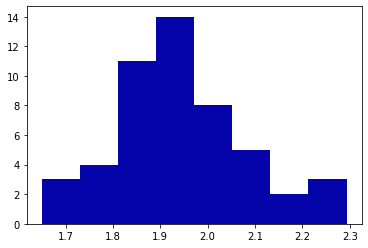

In [16]:
print('histogram für 1min')
plt.hist(x=RR_1min_inter, bins='auto', color='#0504aa')     #,alpha=0.7, rwidth=0.85